In [ ]:
# install kaggle and download (if using kaggle)
!pip install -q kaggle
# then run these after you have uploaded kaggle.json to /content
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d feyzazkefe/trashnet -p /content
!unzip -q /content/trashnet.zip -d /content/trashnet


cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open /content/trashnet.zip, /content/trashnet.zip.zip or /content/trashnet.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# install kaggle and download (if using kaggle)
!pip install -q kaggle
# then run these after you have uploaded kaggle.json to /content
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d feyzazkefe/trashnet -p /content
!unzip -q /content/trashnet.zip -d /content/trashnet


Dataset URL: https://www.kaggle.com/datasets/feyzazkefe/trashnet
License(s): unknown
  0% 0.00/40.8M [00:00<?, ?B/s]
100% 40.8M/40.8M [00:00<00:00, 1.02GB/s]


In [ ]:
# display first 10 images with labels
from pathlib import Path
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt

root = Path('/content/trashnet')   # change if different
classes = sorted([d.name for d in root.iterdir() if d.is_dir()])
print("Classes:", classes)

imgs = []
labels = []
for c in classes:
    p = root / c
    for i, f in enumerate(sorted(p.iterdir())):
        if f.is_file(): # Add this check to ensure it's a file
            imgs.append(f)
            labels.append(c)
            if len(imgs) >= 10: break
    if len(imgs) >= 10: break

plt.figure(figsize=(12,6))
for i, imgp in enumerate(imgs):
    plt.subplot(2,5,i+1)
    im = Image.open(imgp)
    plt.imshow(im); plt.axis('off')
    plt.title(labels[i])
plt.show()

Classes: ['dataset-resized']


<Figure size 1200x600 with 0 Axes>

In [ ]:
from collections import Counter
from pathlib import Path
root = Path('/content/trashnet')
counts = {}
for c in sorted([d.name for d in root.iterdir() if d.is_dir()]):
    counts[c] = len(list((root/c).glob('*')))
counts


{'dataset-resized': 6}

In [ ]:
from PIL import Image
import os

bad = []
for c in counts:
    for f in (root/c).glob('*'):
        try:
            im = Image.open(f)
            im.verify()   # will raise if corrupted
        except Exception as e:
            bad.append(str(f))
            try:
                os.remove(f)     # remove corrupted file
            except: pass

print("Removed corrupted files:", len(bad))
bad[:5]


Removed corrupted files: 6


['/content/trashnet/dataset-resized/metal',
 '/content/trashnet/dataset-resized/cardboard',
 '/content/trashnet/dataset-resized/glass',
 '/content/trashnet/dataset-resized/paper',
 '/content/trashnet/dataset-resized/plastic']

In [ ]:
from PIL import Image
from pathlib import Path
clean_dir = Path('/content/trashnet_clean')
clean_dir.mkdir(exist_ok=True)
size = (224,224)

for c in sorted([d.name for d in root.iterdir() if d.is_dir()]):
    (clean_dir/c).mkdir(parents=True, exist_ok=True)
    for f in (root/c).glob('*'):
        try:
            im = Image.open(f).convert('RGB')
            im = im.resize(size)   # simple resize
            im.save(clean_dir/c/f.name)
        except Exception as e:
            print("skip", f, e)


skip /content/trashnet/dataset-resized/metal [Errno 21] Is a directory: '/content/trashnet/dataset-resized/metal'
skip /content/trashnet/dataset-resized/cardboard [Errno 21] Is a directory: '/content/trashnet/dataset-resized/cardboard'
skip /content/trashnet/dataset-resized/glass [Errno 21] Is a directory: '/content/trashnet/dataset-resized/glass'
skip /content/trashnet/dataset-resized/paper [Errno 21] Is a directory: '/content/trashnet/dataset-resized/paper'
skip /content/trashnet/dataset-resized/plastic [Errno 21] Is a directory: '/content/trashnet/dataset-resized/plastic'
skip /content/trashnet/dataset-resized/trash [Errno 21] Is a directory: '/content/trashnet/dataset-resized/trash'


In [ ]:
from PIL import ImageOps
small_class = 'trash'   # change if your dataset differs
src = clean_dir/small_class
files = list(src.glob('*'))
for i,f in enumerate(files):
    if i >= 100: break
    im = Image.open(f)
    im2 = ImageOps.mirror(im)
    im2.save(src/f"{f.stem}_flip{f.suffix}")


In [ ]:
!zip -r /content/trashnet_clean.zip /content/trashnet_clean


  adding: content/trashnet_clean/ (stored 0%)
  adding: content/trashnet_clean/dataset-resized/ (stored 0%)


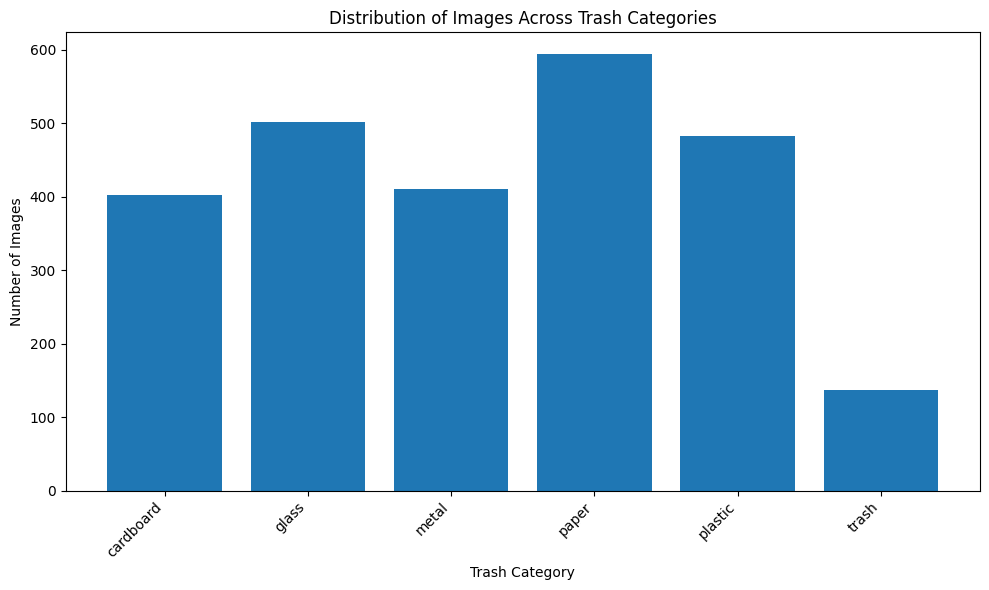

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt

root = Path('/content/trashnet/dataset-resized')  # Point to the dataset-resized directory
classes = sorted([d.name for d in root.iterdir() if d.is_dir()])

counts = {}
for c in classes:
    p = root / c
    counts[c] = len(list(p.iterdir()))

plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values())
plt.xlabel("Trash Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Images Across Trash Categories")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
from pathlib import Path
root = Path('/content/trashnet')
counts = {}
for c in sorted([d.name for d in root.iterdir() if d.is_dir()]):
    counts[c] = len(list((root/c).glob('*')))
counts


{'dataset-resized': 6}

In [ ]:
from PIL import Image
import os

bad = []
for c in counts:
    for f in (root/c).glob('*'):
        try:
            im = Image.open(f)
            im.verify()   # will raise if corrupted
        except Exception as e:
            bad.append(str(f))
            try:
                os.remove(f)     # remove corrupted file
            except: pass

print("Removed corrupted files:", len(bad))
bad[:5]


Removed corrupted files: 6


['/content/trashnet/dataset-resized/metal',
 '/content/trashnet/dataset-resized/cardboard',
 '/content/trashnet/dataset-resized/glass',
 '/content/trashnet/dataset-resized/paper',
 '/content/trashnet/dataset-resized/plastic']

In [ ]:
from PIL import Image
from pathlib import Path
clean_dir = Path('/content/trashnet_clean')
clean_dir.mkdir(exist_ok=True)
size = (224,224)

# Correct the root path to the directory containing image subfolders
root = Path('/content/trashnet/dataset-resized')

for c in sorted([d.name for d in root.iterdir() if d.is_dir()]):
    (clean_dir/c).mkdir(parents=True, exist_ok=True)
    # Modify to only process image files
    for f in (root/c).glob('*'):
        if f.is_file() and f.suffix.lower() in ['.jpg', '.jpeg', '.png', '.gif']:
            try:
                im = Image.open(f).convert('RGB')
                im = im.resize(size)   # simple resize
                im.save(clean_dir/c/f.name)
            except Exception as e:
                print("skip", f, e)

In [ ]:
from PIL import ImageOps
small_class = 'trash'   # change if your dataset differs
src = clean_dir/small_class
files = list(src.glob('*'))
for i,f in enumerate(files):
    if i >= 100: break
    im = Image.open(f)
    im2 = ImageOps.mirror(im)
    im2.save(src/f"{f.stem}_flip{f.suffix}")


In [ ]:
!zip -r /content/trashnet_clean.zip /content/trashnet_clean


updating: content/trashnet_clean/ (stored 0%)
updating: content/trashnet_clean/dataset-resized/ (stored 0%)


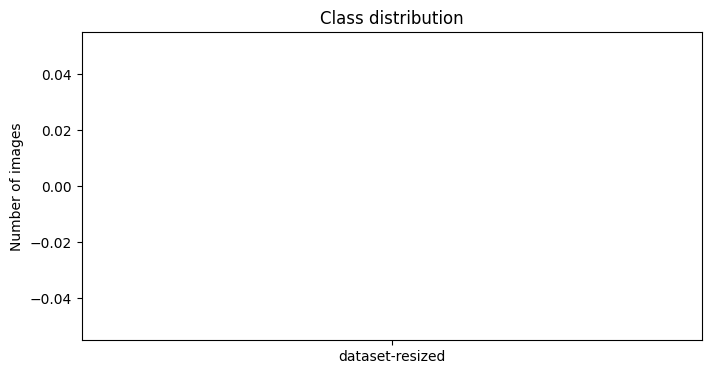

In [ ]:
import matplotlib.pyplot as plt
classes = sorted([d.name for d in clean_dir.iterdir() if d.is_dir()])
counts = [len(list((clean_dir/c).glob('*'))) for c in classes]
plt.figure(figsize=(8,4))
plt.bar(classes, counts)
plt.title("Class distribution")
plt.ylabel("Number of images")
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
i=1
for c in classes:
    files = list((clean_dir/c).glob('*'))[:3]
    for f in files:
        plt.subplot(len(classes),3,i)
        plt.imshow(Image.open(f)); plt.axis('off')
        if i%3==2: plt.title(c)
        i+=1
plt.show()


<Figure size 1200x800 with 0 Axes>

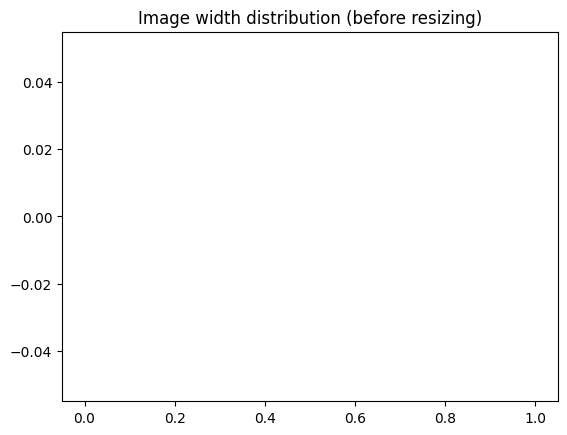

In [ ]:
# if you didn't store original sizes, run on original root to show variety
sizes = []
for c in sorted([d.name for d in root.iterdir() if d.is_dir()]):
    for f in (root/c).glob('*'):
        try:
            im=Image.open(f)
            sizes.append(im.size)
        except:
            pass

# plot histogram of widths
widths = [s[0] for s in sizes]
plt.hist(widths, bins=20)
plt.title("Image width distribution (before resizing)")
plt.show()


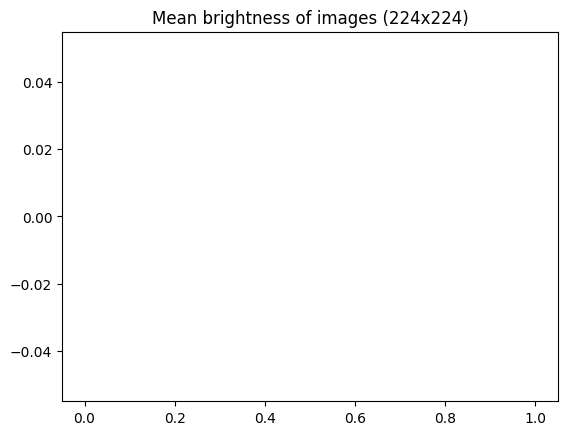

In [ ]:
import numpy as np
means = []
for c in classes:
    for f in (clean_dir/c).glob('*'):
        im = np.array(Image.open(f)).astype('float32')
        means.append(im.mean())
plt.hist(means, bins=30)
plt.title("Mean brightness of images (224x224)")
plt.show()


# Task
Fix the `ValueError: perplexity must be less than n_samples` error in the t-SNE visualization code.

## Re-download and unzip data

### Subtask:
Ensure the dataset is available by re-running the download and unzip commands.


**Reasoning**:
Re-running the cell with the download and unzip commands will ensure the dataset is available in the expected directory, addressing the potential issue of the data not being present or correctly extracted, which could lead to subsequent errors.



In [ ]:
# install kaggle and download (if using kaggle)
!pip install -q kaggle
# then run these after you have uploaded kaggle.json to /content
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d feyzazkefe/trashnet -p /content
!unzip -q /content/trashnet.zip -d /content/trashnet

Dataset URL: https://www.kaggle.com/datasets/feyzazkefe/trashnet
License(s): unknown
trashnet.zip: Skipping, found more recently modified local copy (use --force to force download)
replace /content/trashnet/dataset-resized/cardboard/cardboard1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Total samples: 600
Using perplexity = 30


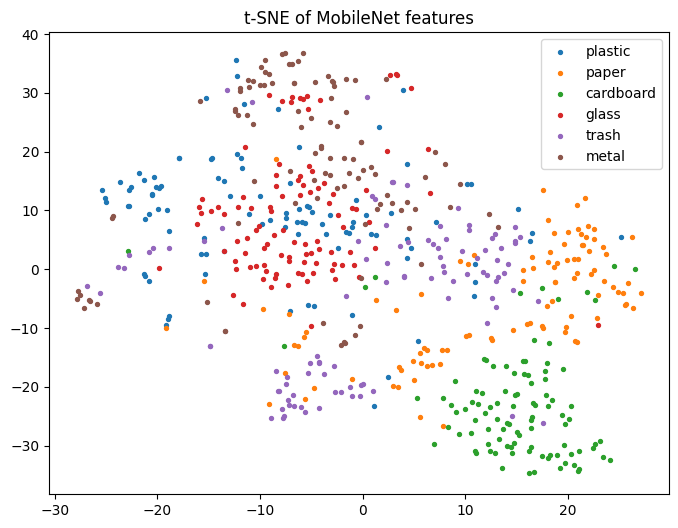

In [ ]:
# install tensorflow if not installed
!pip install -q tensorflow

import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from sklearn.manifold import TSNE
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Assuming 'clean_dir' and 'classes' are defined in previous cells
# If not, you might need to define them here or run the relevant previous cells.
clean_dir = Path('/content/trashnet_clean')
classes = sorted([d.name for d in clean_dir.iterdir() if d.is_dir()])

def extract_features(data_dir, classes, model, num_samples_per_class=100):
    """Extracts features from images using a pre-trained model."""
    embeddings = []
    labels = []
    for c in classes:
        files = list((data_dir / c).glob('*'))[:num_samples_per_class]
        for f in files:
            try:
                img = Image.open(f).convert("RGB")
                x = np.array(img.resize((224, 224)))[None, ...]
                x = preprocess_input(x)
                e = model.predict(x, verbose=0)
                embeddings.append(e[0])
                labels.append(c)
            except Exception as err:
                print(f"Skipping file {f} due to error: {err}")
                continue
    return np.array(embeddings), labels

def plot_tsne(embeddings, labels, perplexity=30):
    """Performs t-SNE and plots the results."""
    n_samples = embeddings.shape[0]
    if n_samples < perplexity:
        print(f"Warning: n_samples ({n_samples}) is less than perplexity ({perplexity}). Adjusting perplexity.")
        perplexity = max(5, n_samples - 1) # Adjust perplexity if needed
        if perplexity < 1:
            print("Error: Not enough samples to perform t-SNE.")
            return

    print("Using perplexity =", perplexity)
    ts = TSNE(n_components=2, random_state=42, perplexity=perplexity).fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for cl in set(labels):
        ix = [i for i, l in enumerate(labels) if l == cl]
        plt.scatter(ts[ix, 0], ts[ix, 1], label=cl, s=8)
    plt.legend()
    plt.title("t-SNE of MobileNet features")
    plt.show()

# Load MobileNetV2 for feature extraction
model = MobileNetV2(include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Extract embeddings
emb, labs = extract_features(clean_dir, classes, model, num_samples_per_class=100)
print("Total samples:", len(emb))

# Perform t-SNE and plot
plot_tsne(emb, labs, perplexity=min(30, max(5, len(emb) // 3))) # Use adjusted perplexity